# Leren: Programming assignment 3
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">de Groot</span> (<span style="color:red">10434410</span>)<br>
**Student 2:** <span style="color:red">dijkzeul</span> (<span style="color:red">10554386</span>)<br>

-----------------------------------
You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Write down your functions in the cells they belong to. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you. 

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Regularized Logistic Regression

1) Reading in data

In [170]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Read the csv file with pandas
Digits = pd.read_csv('digits123.csv', sep=",", header=None)

Digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
2,0,0,0,2,16,16,2,0,0,0,...,0,0,0,0,2,12,15,4,0,1
3,0,0,0,0,12,5,0,0,0,0,...,0,0,0,0,3,16,8,0,0,1
4,0,0,0,1,11,9,0,0,0,0,...,0,0,0,0,2,14,6,0,0,1


2) Gradient function and Parameter updating

In [164]:
# uses the sigmoid function to calculate the hypothesis
def hypothesis(theta, xVector):
    return 1.0/(1.0+math.e **(-np.dot(theta,xVector)))

# Gradient function for the logistic regression
def gradientLog(theta,xMatrix,yVector, thetaIndex):
    gradient = (1.0/(1+math.e **(np.dot(theta,xMatrix))))-yVector
    gradient = np.dot(gradient,xMatrix[thetaIndex])
    return gradient/len(yVector)
    
# Update the theta vector for logistic regression
def updateLog(alpha, theta, xMatrix, yVector, Lambda):
    regularizationVector = [1]*len(theta)
    tempTheta = [None]*len(theta)
    for i in range(len(theta)):
        regularizationVector[i] *= Lambda/len(yVector)*theta[i]
    regularizationVector[0] = 0
    for i in range(len(theta)):
        tempTheta[i] = theta[i] - alpha * (gradientLog(theta,xMatrix,yVector,i) + regularizationVector[i])
    return tempTheta


3) Cost function


In [163]:
# Calculate the cost for a logistic regrssion function
def costLogFunction(theta, xMatrix, yVector, Lambda):
    costSum = 0.0
    regularization = 0.0
    for i in range(len(yVector)):
        if yVector[i]:
            costSum += math.log(hypothesis(theta,xMatrix[i]))
        else:
            costSum += math.log(1-hypothesis(theta,xMatrix[i]))
            # dit geeft log(0) omdat hypothesis altijd 1 returned
            # dat mag niet
    for i in range(1,len(theta)):
        regularization += theta[i] **2
    return -(costSum/len(yVector) + (2*Lambda/len(yVector)*regularization))
    

4) Pairwise comparison of classess

In [162]:
# split y and multiply theta when multi-class classifying
def splitClasses(theta, yVector):
    classes = list(set(yVector))
    if len(classes) <=2 and 0 in classes:
        return theta, yVector
    else:
        # split y in het aantal klasses
        yMatrix = np.zeros((len(yVector),len(classes)))
        thetaMatrix = np.zeros((len(classes),len(theta)))
        for i in range(len(classes)):
            for j in range(len(yVector)):
                if yVector[j] == classes[i]:
                    yMatrix[j][i] = 1
                else:
                    yMatrix[j][i] = 0
            thetaMatrix[i] = theta
        yMatrix = yMatrix.T
        return thetaMatrix, yMatrix
            

5) Optimization learning rate and iterations

Old costs:  [[0.6983514473972593, 0.69861915957438092, 0.69850901197290327]]
New cost:  [0.59688022315208678, 0.60631190965549586, 0.60140973016526666]


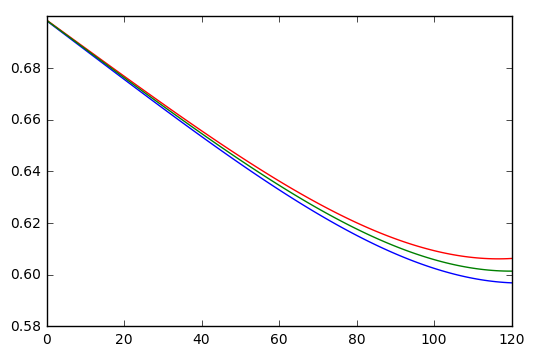

In [167]:
def logreg():

    alpha = 0.00001
    iterations = 120
    # Echt geen idee welke waarde Lambda moet hebben. Het werkt nu nog steeds dus maybe is het goed?
    Lambda = 10
    yVector = Digits[Digits.columns[-1]]
    xMatrix = np.ones((Digits.columns[-1]+1,len(yVector)))
    theta = np.ones((Digits.columns[-1]+1))*0.0001
    for i in range(1,Digits.columns[-1]):
        xMatrix[i] = Digits[i]
        
    thetaMatrix, yMatrix = splitClasses(theta, yVector)
    
    costs = [[]]
    for i in range(len(yMatrix)):
        costs[0].append(costLogFunction(thetaMatrix[i], xMatrix.T, yMatrix[i], Lambda))
    print "Old costs: ", costs
    
    for i in range(iterations):
        costs.append([])
        for j in range(len(yMatrix)):
            thetaMatrix[j] = updateLog(alpha, thetaMatrix[j], xMatrix, yMatrix[j], Lambda)
            costs[i+1].append(costLogFunction(thetaMatrix[j], xMatrix.T, yMatrix[j], Lambda))
    
    print "New cost: ", costs[-1]
    costs = np.array(costs).T
    x = np.arange(0,len(costs[0]))
    
    plt.plot(x,costs[0])
    plt.plot(x,costs[1], 'r')
    plt.plot(x,costs[2], 'g')
    plt.show()
    
logreg()

**Discussion:**
1 a)
It is difficult to find a good value for lambda. Mostly because it is difficult to make an insightful plot when there are 64 features. Current value is 10.

1 b)

Came only as far as generating some data with noise

-----------------------------------

1 b) 

In [190]:
# Hier moet 1 b nog

# has 3 features
def makeData(desicionBoundary,datasetSize, noise):
    dataSet = np.matrix([np.zeros(datasetSize),np.zeros(datasetSize),np.zeros(datasetSize)]) 
    actualValues = np.matrix([np.zeros(datasetSize)]).T
    for i in range(datasetSize):
        dataSet[0,i] = random.random()
        dataSet[1,i] = random.random()
        dataSet[2,i] = random.random()
        randNoise = noise*random.random()
        if dataSet[0,i] * dataSet[1,i] * dataSet[2,i] >= desicionBoundary + randNoise:
            actualValues[i] = 1
    return dataSet, actualValues  

dataSet, actualValues = makeData(0.05, 10, 0.01)
dataSet = np.array(dataSet)
actualValues = np.array(actualValues)
print dataSet, actualValues

[[ 0.40541876  0.95537676  0.1167286   0.93247819  0.19285523  0.37488396
   0.49177804  0.89490683  0.06902413  0.30385569]
 [ 0.5405206   0.61589676  0.60558796  0.57733631  0.25960046  0.74360678
   0.69018262  0.97228646  0.96484523  0.4397928 ]
 [ 0.08623233  0.08238375  0.58929517  0.59642671  0.58601664  0.31436157
   0.79288834  0.2883034   0.88237479  0.08408899]] [[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]


## Neural Network
1) Forward propagation

In [168]:
# uses the sigmoid function to calculate the hypothesis
# not actually the hypothesis any more, is used because it was called that in the
# previous exercise. 
def hypothesisNN(theta, xVector):
    #print "xVec in hyp: ", xVector
    #print "Theta in hyp: ", theta
    #print "ThetT * x: ", theta*xVector
    return 1.0/(1.0+math.e **(-np.asscalar((theta*xVector)[0])))

# Thetamtrix is a list of matrices.
def forwardPropagationSimple(xMatrix, thetaMatrix):
    activationLayer = hypothesisNN(thetaMatrix[0],xMatrix)
    activationLayer = np.matrix([[activationLayer]])
    #print "Activation 2: ", activationLayer
    outputLayer = np.matrix([[hypothesisNN(thetaMatrix[1], activationLayer)]])
    return [activationLayer, outputLayer]


2) Error Backpropagation

In [169]:
# For the whole simplified part no normalization is used


# Does one iteration of back propagation
# It is important to note that the bias node in layer l should not be used to
# back propage the error to the earlier layer, otherwise the dimentions of 
# delta will not be correct
def backPropagationSimple(activationValues, thetaMatrix, Delta, yVector, xMatrix):
    #print "Act-1 - Y: ", activationValues[-1] - yVector[0]
    delta1 = np.matrix(activationValues[-1] - yVector[0])
    #print "Delt1: ", delta1
    # Nog iets met delta doen
    # is geen goede sintax
    gz2 = np.multiply(activationValues[-2], np.subtract(1,activationValues[-2]))
    #print "g(z)2: ", gz2
    # gekut met numpy. dot product doet raar.
    # Maybe toch maar alles in matrices veranderen
    #print "theta*delt1 in bpr: ", theta[-1].T*delta1
    delta2 = np.multiply((theta[-1].T * delta1), gz2)
    #print "delta2: ", delta2
    Delta[-1] = Delta[-1] + delta1 * activationValues[-2].T
    #print "Delta-1: ", Delta[-1]
    Delta[-2] = Delta[-2] + delta2 * xMatrix[0].T
    #print "Delta-2: ", Delta[-2]
    return Delta

# computes the net theta based on the matrices of partial derivatives (Delta)
def updateTheta(Theta, Delta, alpha):
    for i in range(len(Theta)):
        Theta[i] = Theta[i] - alpha*Delta[i]
    return Theta

# The costfunction is simplified to a dataset of one 
# The number of classes is also one 
def costFunctionSimple(hypothesisValue, yVector):
    result = -(np.asscalar(yVector) * math.log(np.asscalar(hypothesisValue))) 
    result -= ((1-np.asscalar(yVector)) * math.log(1-np.asscalar(hypothesisValue)))
    return result
    
iterations = 18
alpha = 0.001
yVector = np.matrix([1])
xMatrix = [np.matrix([[-5]])]
# theta[i] is the matrix that describes theta between the i'th and i+1'st layer
theta = [np.matrix([[0.5]]),np.matrix([[0.5]])]
Delta = [np.matrix([[0.0]]),np.matrix([[0.0]])]
hypothesisValue = 0
for runtime in range(iterations):
    for i in range(len(yVector)):
        activationValues = forwardPropagationSimple(xMatrix[0], theta)
        #print "Activ: ", activationValues
        hypothesisValue = activationValues[-1]
        cost = costFunctionSimple(hypothesisValue, yVector)
        if runtime%3 == 1:
            print "Cost: ", cost
        Deltatemp = backPropagationSimple(activationValues, theta, Delta, yVector, xMatrix)
        for j in range(len(Delta)):
            Delta[j] = Delta[j] + Deltatemp[j]       
    #print Delta

    for i in range(len(yVector)):
        Delta[i] = Delta[i]/len(yVector)
    # after doing forward and backward prop for each example in the dataset
    # it is time to update theta
    theta = updateTheta(theta, Delta, alpha)
    #print theta




Cost:  0.67434489419
Cost:  0.673900638736
Cost:  0.669532629131
Cost:  0.593328900086
Cost:  0.163415694989
Cost:  3.20879550409e-05


3) Complete Backpropagation

**Discussion:**

1&2, simple NN)
With a little effort it was possible to implement the most basic form of a neural net. 
With 18 iterations of the net, the cost calculated by the cost function has decreased to almost 0.
If one extra iteration is tried the hypothesis returned by forward propagation rounds to 1,
causing the log(1-hypothesis) to error. If we look at the data this means that the network predicts the value
of 1. Which is the actual value, meaning it is a near perfect prediction.

3, complete NN)
This has not been attempted yet.

-----------------------------------